Simulate data from a linear model and run a random forest on it 

In [119]:
set.seed(123)

nobs <- 5000

e <- rnorm(nobs,0,10)
x <- seq(1,100, length.out=nobs)
intercept <- 5
b <- 2

y <- intercept + b * x + e

df <- data.frame(y,x,e)

In [120]:
library(randomForest)

In [121]:
fit <- randomForest(y ~ x, data=df, importance=TRUE, ntree=500)

In [122]:
df$predicted <- predict(fit, df)

In [123]:
# plot(df$x, df$predicted, type="l") 
# points(df$x, df$y) 

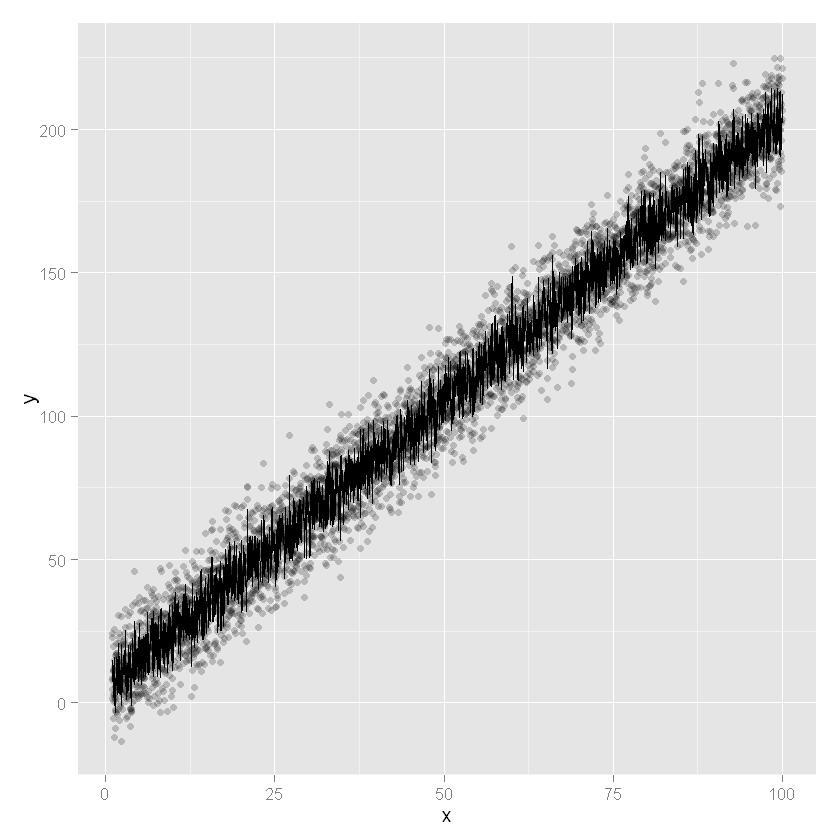

In [124]:
library(ggplot2)
ggplot(data=df, aes(x=x)) +
     geom_point(aes(y=y), alpha=0.2) + 
     scale_colour_hue(h = c(180,0)) + 
     geom_line(aes(y=predicted))
     

In [125]:
#So we can see that the model is prone to overfitting
# install.packages(c("gbm"),repos="http://cran.rstudio.com/" )
library(caret)

fitControl <- trainControl(## 10-fold CV
                           method = "repeatedcv",
                           number = 10,
                           ## repeated ten times
                           repeats = 10)


gbm_model <- train(y ~ x,
                    df,
                    distribution = "gaussian",
                    method = "gbm",
                    trControl = fitControl,
                    verbose = FALSE)

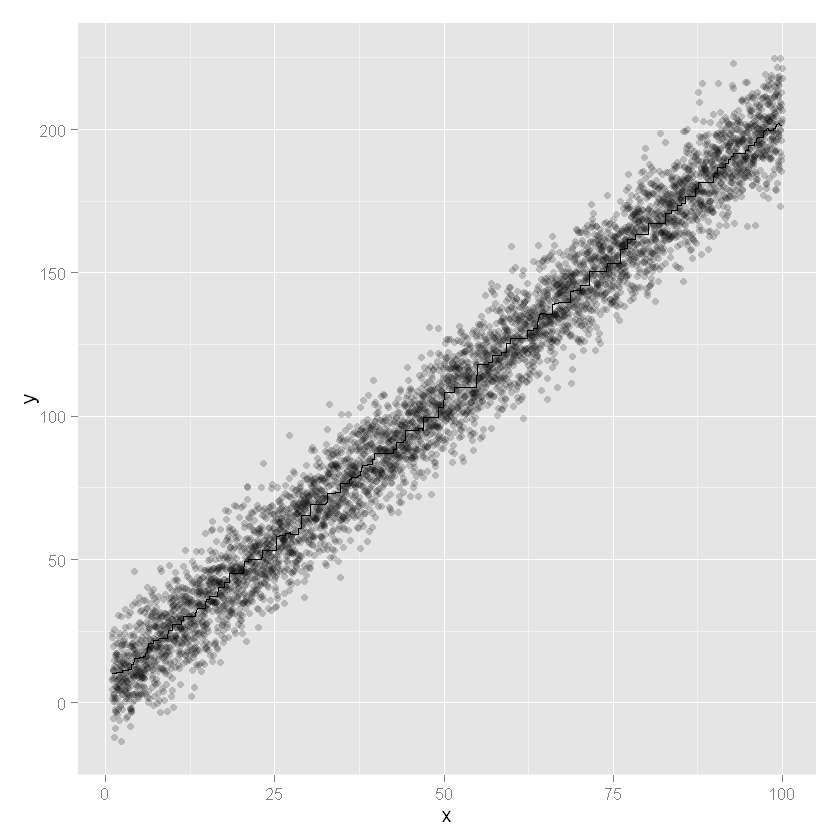

In [126]:
library(ggplot2)
ggplot(data=df, aes(x=x)) +
     geom_point(aes(y=y), alpha=0.2) + 
     scale_colour_hue(h = c(180,0)) + 
     geom_line(aes(y=predict(gbm_model,df)))



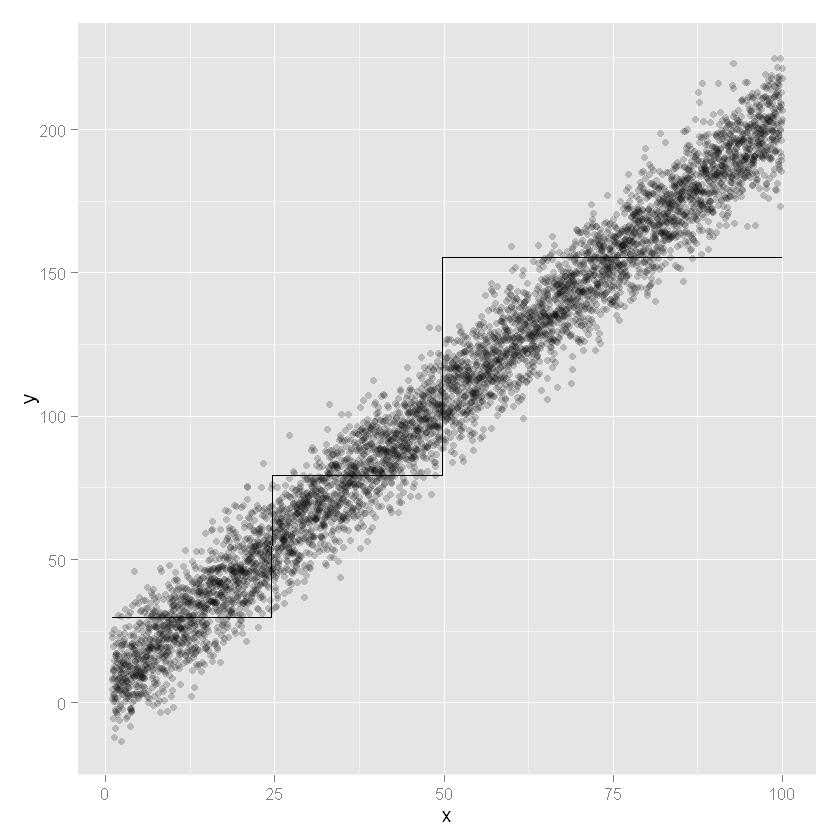

In [134]:
fit <- randomForest(y ~ x, data=df, importance=TRUE, ntree=1, maxnode=3)

library(ggplot2)
ggplot(data=df, aes(x=x)) +
     geom_point(aes(y=y), alpha=0.2) + 
     scale_colour_hue(h = c(180,0)) + 
     geom_line(aes(y=predict(fit,df)))
     